[![image](https://raw.githubusercontent.com/visual-layer/visuallayer/main/imgs/vl_horizontal_logo.png)](https://www.visual-layer.com)

# Analyzing Hugging Face Datasets

This notebook shows how you can use fastdup to analyze any datasets from [Hugging Face Datasets](https://huggingface.co/docs/datasets/index).

We will analyze an image classification dataset for:

+ Duplicates / near-duplicates.
+ Outliers.
+ Wrong labels.

## Installation

In [1]:
!pip install -Uq fastdup datasets

Now, test the installation. If there's no error message, we are ready to go.

In [2]:
import fastdup
fastdup.__version__

/usr/bin/dpkg


'1.22'

## Load Dataset

In this example we load the Tiny ImageNet dataset from [Hugging Face Datasets](https://huggingface.co/datasets)..

Tiny ImageNet contains 100,000 images of 200 classes (500 for each class) downsized to 64×64 colored images. Each class has 500 training images, 50 validation images, and 50 test images.

Let's load the dataset into our local directory.

In [3]:
import datasets
dataset = datasets.load_dataset("zh-plus/tiny-imagenet", split="all", cache_dir='images_dir')

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /media/dnth/Active-Projects/dnth-fastdup/examples/images_dir/zh-plus___parquet/Maysee--tiny-imagenet-2eb6c3acd8ebc62a/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


We can inspect the `dataset` object.

In [4]:
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 110000
})

In [5]:
dataset[0]

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64>,
 'label': 0}

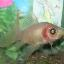

In [6]:
dataset[0]['image']

In [7]:
dataset[0]['label']

0

## Get labels mapping

Tiny ImageNet follows the original ImageNet class names. Let's download the class mappings `classes.py`.

In [8]:
!wget -q https://huggingface.co/datasets/zh-plus/tiny-imagenet/raw/main/classes.py

Here's the top 10 lines of `classes.py`.

In [9]:
!head -n 10 classes.py

i2d = {
  "n00001740": "entity",
  "n00001930": "physical entity",
  "n00002137": "abstraction, abstract entity",
  "n00002452": "thing",
  "n00002684": "object, physical object",
  "n00003553": "whole, unit",
  "n00003993": "congener",
  "n00004258": "living thing, animate thing",
  "n00004475": "organism, being",


Now we can get the class names by providing the class id. For example

In [10]:
from classes import i2d

In [11]:
i2d["n00001740"]

'entity'

## Save Images to Disk

The images are downloaded in a parquet format. Let's save them into the local disk.

In [12]:
import os
from tqdm.auto import tqdm

for idx, item in tqdm(enumerate(dataset), total=len(dataset)):        
    # extract the image and label
    image = item['image']
    label = i2d[dataset.features['label'].int2str(item['label'])]

    # create a directory for the class if it doesn't exist
    label_dir = os.path.join('images_dir/images', str(label))
    os.makedirs(label_dir, exist_ok=True)

    # save the image to the appropriate directory
    image.save(os.path.join(label_dir, f'{idx}.jpg'))

  0%|          | 0/110000 [00:00<?, ?it/s]

## Run fastdup

In [13]:
fd = fastdup.create(input_dir='images_dir/images')
fd.run()

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-07-04 10:46:16 [INFO] Going to loop over dir images_dir/images
2023-07-04 10:46:17 [INFO] Found total 110000 images to run on, 110000 train, 0 test, name list 110000, counter 110000 
2023-07-04 10:50:00 [INFO] Found total 110000 images to run onmated: 0 Minutes
Finished histogram 30.955
Finished bucket sort 31.144
2023-07-04 10:50:23 [INFO] 23053) Finished write_index() NN model
2023-07-04 10:50:23 [INFO] Stored nn model index file work_dir/nnf.index
2023-07-04 10:50:35 [INFO] Total time took 258529 ms
2023-07-04 10:50:35 [INFO] Found a total of 54 fully identical images (d>0.990), which are 0.02 %
2023-07-04 10:50:35 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 %
2023-07-04 10:50:35 [INFO] Found a total of 12656 above threshold images (d>0.900), which are 5.75 %
2023-07-04 10:50:35 [INFO] Found a total of 11001 outlier images         (d<0.050), which are 5.00 %
2023-07-04 10:5

0

## Inspect Issues

There are several methods we can use to inspect the issues found

```python
fd.vis.duplicates_gallery()    # create a visual gallery of duplicates
fd.vis.outliers_gallery()      # create a visual gallery of anomalies
fd.vis.component_gallery()     # create a visualization of connected components
fd.vis.stats_gallery()         # create a visualization of images statistics (e.g. blur)
fd.vis.similarity_gallery()    # create a gallery of similar images
```

100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 292.24it/s]


Stored similarity visual view in  work_dir/galleries/duplicates.html



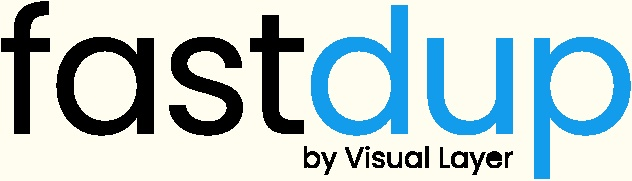
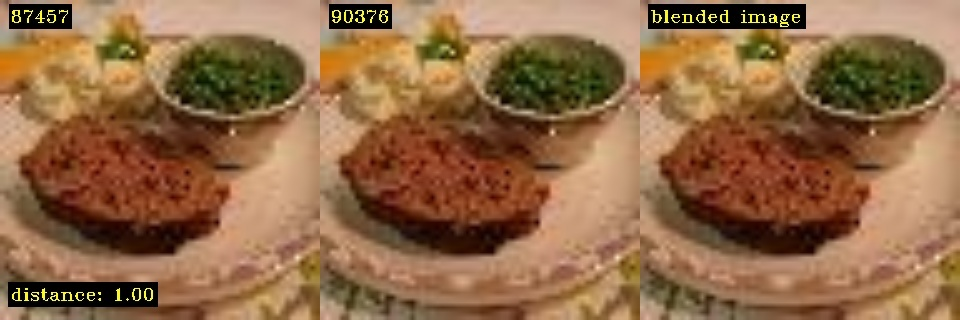
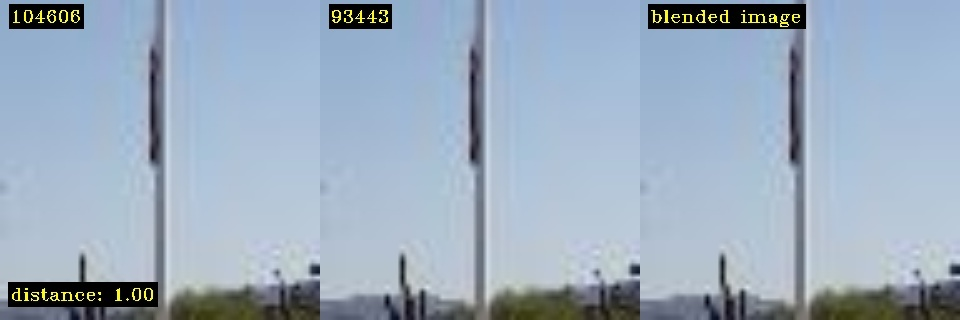
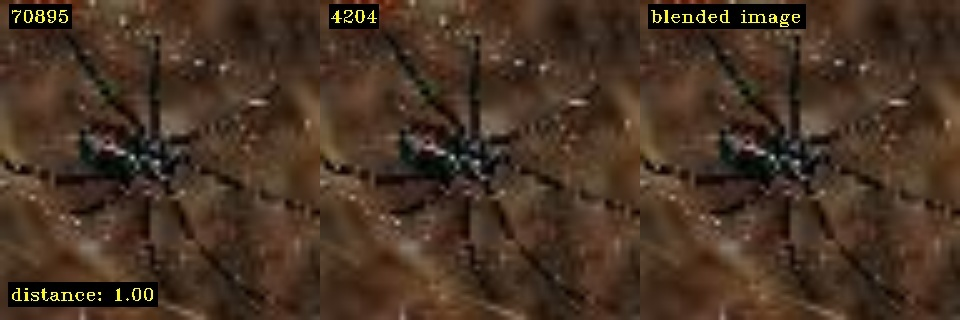
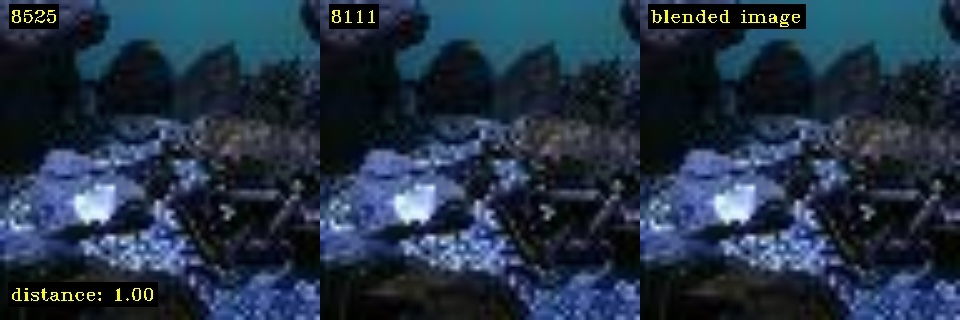
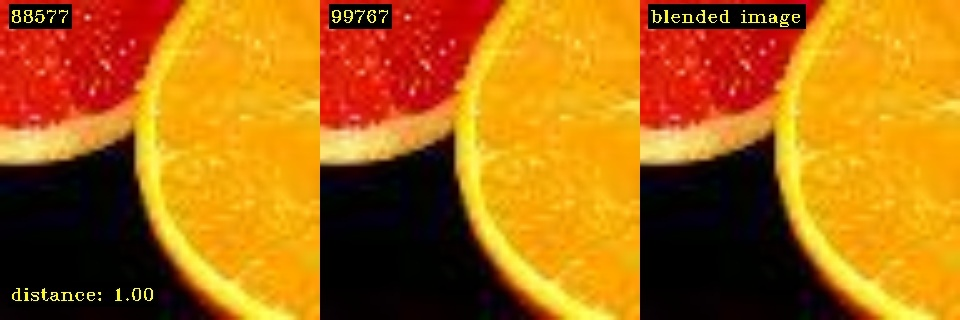
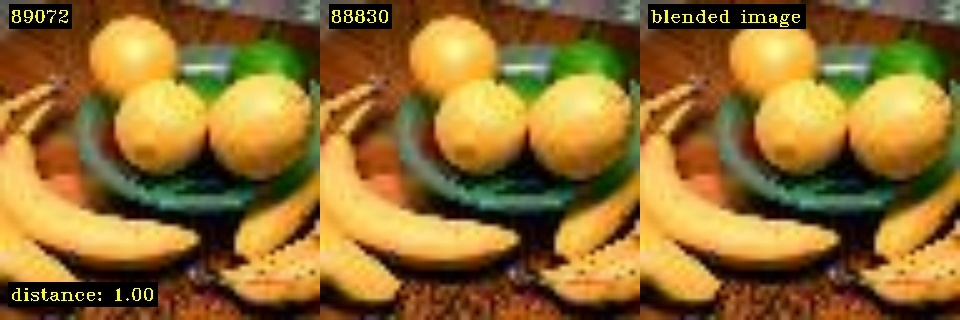
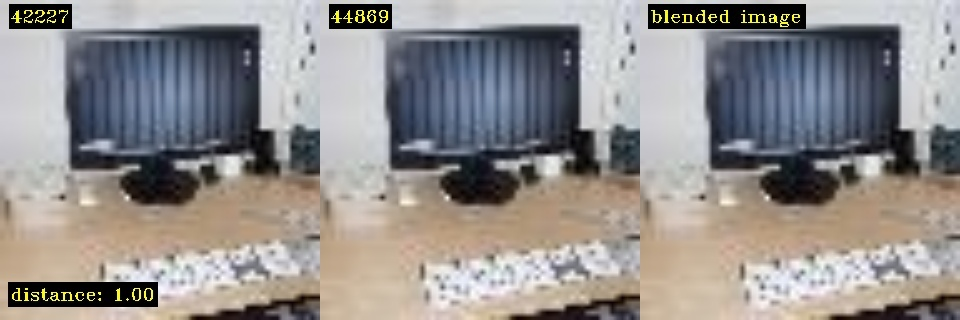
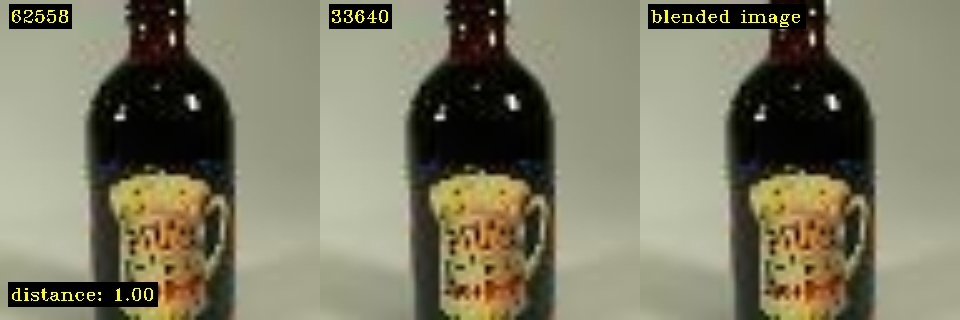
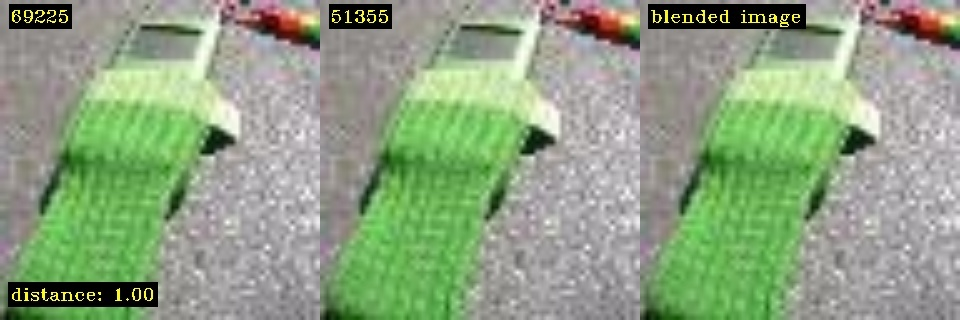
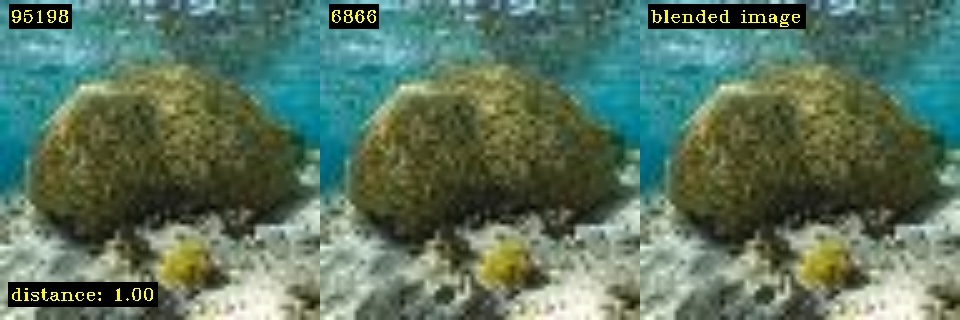
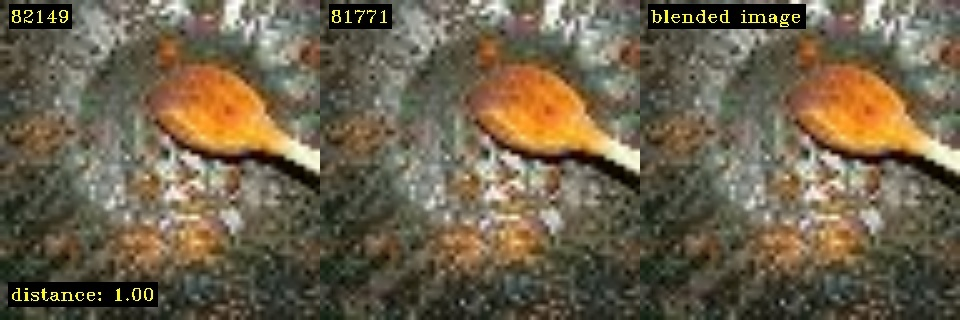
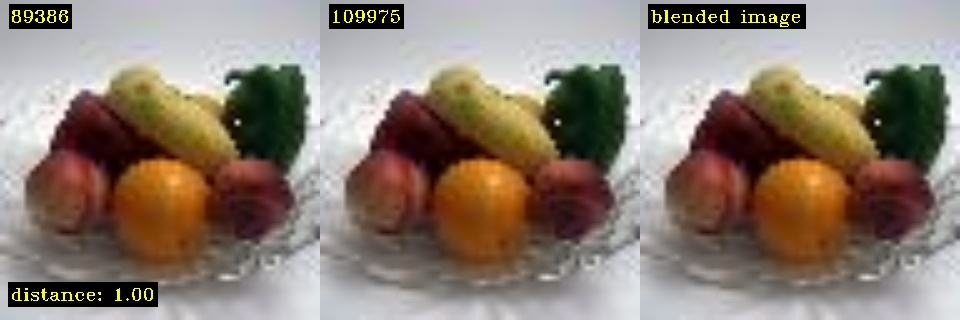
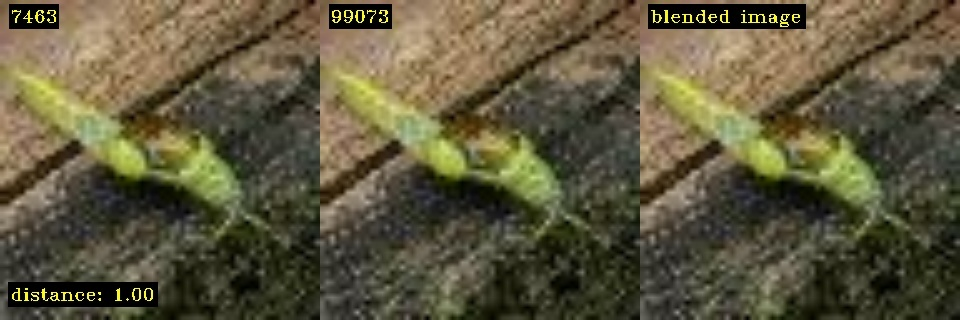
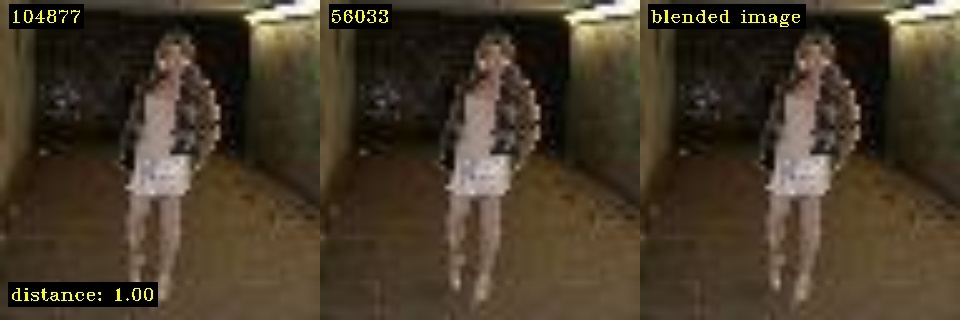
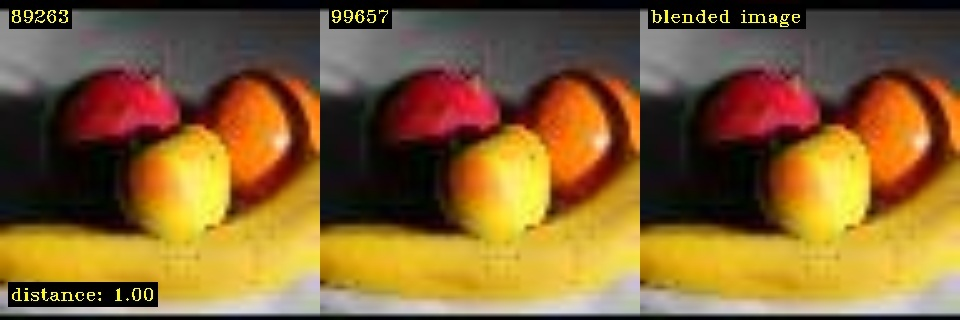

0

In [14]:
fd.vis.duplicates_gallery()

100%|█████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 21743.41it/s]


Stored outliers visual view in  work_dir/galleries/outliers.html



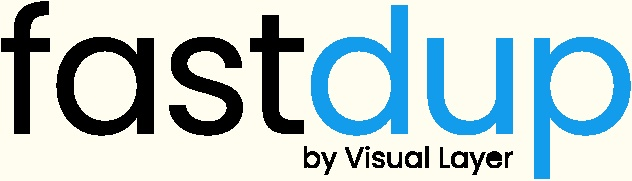
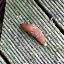
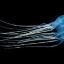
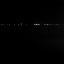
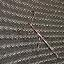
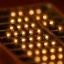
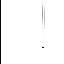
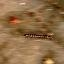
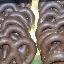
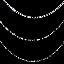
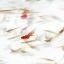
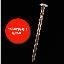
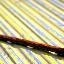
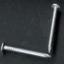
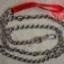
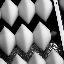
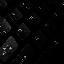
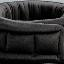
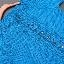
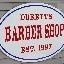
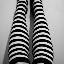

0

In [15]:
fd.vis.outliers_gallery()

## Wrap Up

That's a wrap! In this notebook we showed how you can run fastdup on a Hugging Face Dataset. You can use similar methods to run on other similar datasets on [Huggging Face Datasets](https://huggingface.co/datasets).

Try it out and let us know what issues you find.


We recommend checking out -

- [**Quick Dataset Analysis**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/quick-dataset-analysis.ipynb) - Learn how to quickly analyze a dataset for potential issues. Identify duplicates, outliers, dark/bright/blurry images, and cluster similar images with only a few lines of code.

- [**Cleaning Image Dataset**](https://nbviewer.org/github/visual-layer/fastdup/blob/main/examples/cleaning-image-dataset.ipynb) -  Learn how to clean a dataset from broken images, duplicates, outliers, and identify dark/bright/blurry images.

- [**Try our free cloud product VL Profiler**](https://app.visual-layer.com) - VL Profiler is our first no-code commercial product that lets you visualize and inspect your dataset in your browser.

[![image](https://raw.githubusercontent.com/visual-layer/fastdup/main/gallery/vl_profiler_promo.svg)](https://app.visual-layer.com)

As usual, feedback is welcome! Drop by our [Slack channel](https://visualdatabase.slack.com/join/shared_invite/zt-19jaydbjn-lNDEDkgvSI1QwbTXSY6dlA#/shared-invite/email) if you have questions!
Happy learning 😀